#Importando DataSets

In [0]:
!pip install yellowbrick

In [0]:
from google.colab import drive
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
path = '/gdrive/My Drive/Colab Notebooks/DataSets'

##1.Plano de Saúde

In [0]:
path_plano = os.path.join(path, 'plano_saude.csv')
base = pd.read_csv(path_plano)

###2.1.Plano de Saúde 2

In [0]:
path_house = os.path.join(path, 'plano_saude2.csv')
base = pd.read_csv(path_house)

##2.Preço Casas

In [0]:
path_house = os.path.join(path, 'house_prices.csv')
base = pd.read_csv(path_house)

#Regressão Linear Simples

##1.Base Plano de Saude

In [0]:
X = base.iloc[:, 0].values
y = base.iloc[:, 1].values

In [0]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [0]:
X = X.reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

b0 - Onde inicia a linha

In [0]:
regressor.intercept_

-558.9490909090912

b1 - Indica o grau de inclinação da linha

In [0]:
regressor.coef_

array([61.86787879])

Text(0, 0.5, 'Custo')

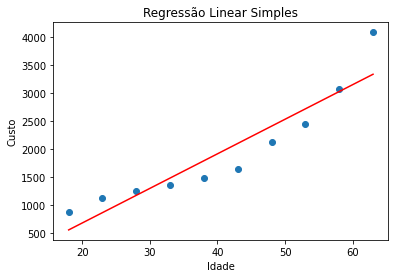

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Regressão Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
previsao1 = regressor.predict([[48]])
previsao1

array([2410.70909091])

In [0]:
previsao2 = regressor.intercept_ + regressor.coef_ * 48
previsao2

array([2410.70909091])

In [0]:
score = regressor.score(X, y)

###Plotando os residuais - Distância de cada ponto para a reta

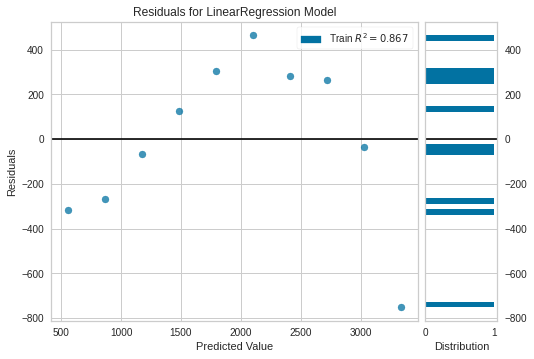

In [0]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y)
visualizador.poof()

##2.Base Preço Casas

In [0]:
X = base.iloc[:, 5:6] .values
y = base.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

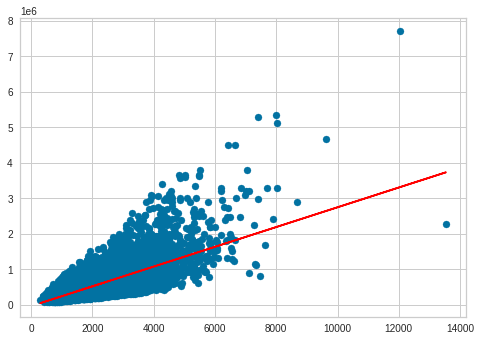

In [0]:
  plt.scatter(X_treinamento, y_treinamento)
  plt.plot(X_treinamento, regressor.predict(X_treinamento), color='red')

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
resultado = abs(y_teste - previsoes)
resultado.mean()

172604.1288999542

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_teste, previsoes)
mse = mean_squared_error(y_teste, previsoes)

In [0]:
mae, mse

(172604.1288999542, 70170013932.1159)

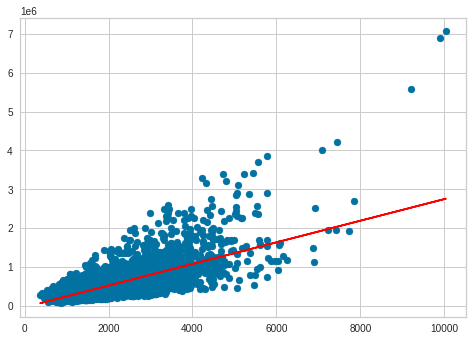

In [0]:
plt.scatter(X_teste, y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color='red')

In [0]:
regressor.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

#Regressão Linear Múltipla

##1.Base Preços Casas

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

In [0]:
score

0.7029888085955007

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, previsoes)

In [0]:
mae

123888.44377485772

In [0]:
regressor.score(X_teste, y_teste)

0.6885414149062775

In [0]:
regressor.intercept_

5736222.7033961015

In [0]:
regressor.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604119e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

#Comparativo - Regressão Linear Polinomial x Regressão Linear

##1.Base Plano de Saude

###Regressão Linear

In [0]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
score = regressor.score(X, y)
score

0.6722701203412687

In [0]:
regressor.predict([[40]])

array([2463.18787879])

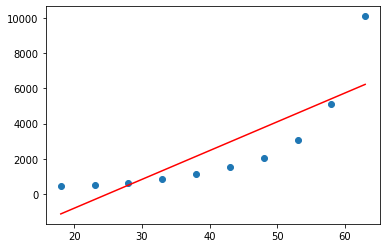

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')


###Regressão Polinomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [0]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
score_poly = regressor_poly.score(X_poly, y)

In [0]:
score_poly

0.9976494147321991

In [0]:
regressor_poly.predict(poly.transform([[40]]))

array([1335.33958015])

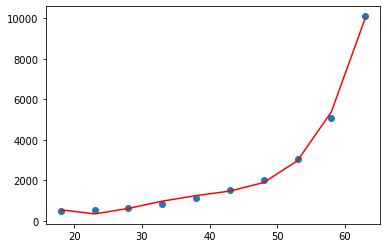

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(poly.fit_transform(X)), color='red')

##2.Base Preço Casas

###Regressão Polinomial

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2].values

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_treinamento_poly = poly.fit_transform(X_treinamento)
X_teste_poly = poly.transform(X_teste)

In [0]:
regressor = LinearRegression()
regressor.fit(X_treinamento_poly, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
score = regressor.score(X_treinamento_poly, y_treinamento)
score

0.8179372091164115

In [0]:
previsoes = regressor.predict(X_teste_poly)
previsoes

array([ 386279.00621796, 1991142.84358978,  579098.07327271, ...,
        432859.80838013,  234193.23796844,  123839.61455536])

In [0]:
from sklearn.metrics import mean_absolute_error

mea = mean_absolute_error(y_teste, previsoes)

In [0]:
mea

101225.5341387295

#Arvores de Decisão

##1.Base Plano de Saude 2

In [0]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

In [0]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X, y)
score = regressor.fit(X, y)

In [0]:
score

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Text(0, 0.5, 'Custo')

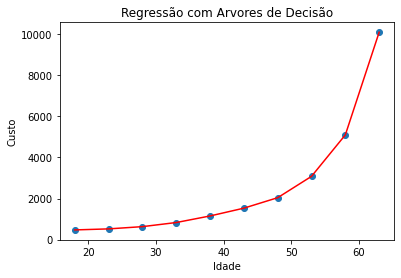

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

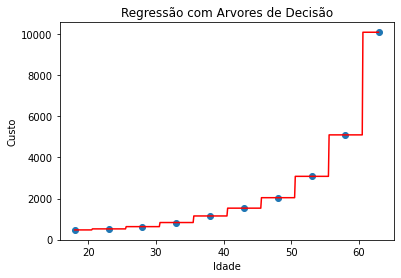

In [0]:
X_teste = np.arange(min(X), max(X), 0.1)
X_teste = X_teste.reshape(-1,1)

plt.scatter(X, y)
plt.plot(X_teste, regressor.predict(X_teste), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

##2.Base Preço Casas

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_treinamento, y_treinamento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
score = regressor.score(X_treinamento, y_treinamento)
score

0.9992712177726063

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste, previsoes)

In [0]:
mae

99018.29973781617

In [0]:
regressor.score(X_teste, y_teste)

0.7306918346747837

#Rando Forest

##1.Base Plano de Saude 2

In [0]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=8)
regressor.fit(X, y)
score = regressor.score(X, y)

In [0]:
score

0.9883455066610257

Text(0, 0.5, 'Custo')

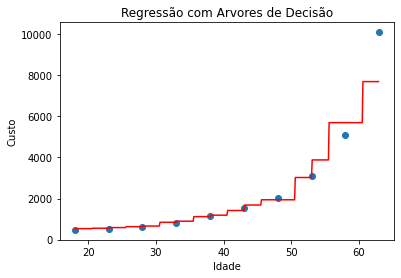

In [0]:
X_teste = np.arange(min(X), max(X), 0.1)
X_teste = X_teste.reshape(-1,1)

plt.scatter(X, y)
plt.plot(X_teste, regressor.predict(X_teste), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

##2.Base Preço Casas

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_treinamento, y_treinamento)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
score = regressor.score(X_treinamento, y_treinamento)
score

0.9813687796312726

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste, previsoes)

In [0]:
mae

68043.64810287594

In [0]:
regressor.score(X_teste, y_teste)

0.8792888129318428

#SVR

##Base Plano de Saude 2

In [0]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

In [0]:
from sklearn.svm import SVR

regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X, y)
score = regressor_linear.score(X, y)
score

0.294299767185203

Text(0, 0.5, 'Custo')

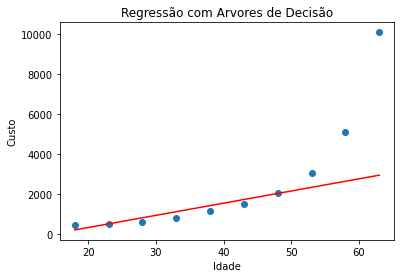

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor_linear.predict(X), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(X, y)
score_poly = regressor_poly.score(X, y)
score_poly

0.6697433307984383

Text(0, 0.5, 'Custo')

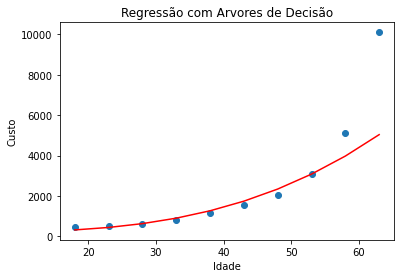

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor_poly.predict(X), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X, y)
score_rbf = regressor_rbf.score(X, y)
score_rbf

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7561578176049305

Text(0, 0.5, 'Custo')

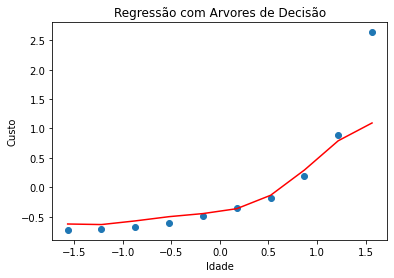

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor_rbf.predict(X), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
previsao_linear = scaler_y.inverse_transform(regressor_linear.predict(scaler_X.transform([[40]])))
previsao_linear

array([-2520181.24449524])

In [0]:
previsao_poly = scaler_y.inverse_transform(regressor_poly.predict(scaler_X.transform([[40]])))
previsao_poly

array([593313.79043875])

In [0]:
previsao_rbf = scaler_y.inverse_transform(regressor_rbf.predict(scaler_X.transform([[40]])))
previsao_rbf

array([1333.85650748])

##2.Base Preço Casas

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2:3].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)
score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8123465093269253

In [0]:
previsoes = regressor.predict(X_teste)

In [0]:
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)

In [0]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, previsoes)
mae

82486.05823058811

In [0]:
regressor.score()

#Redes Neurais

##1.Base Plano Saúde 2

In [0]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [0]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(hidden_layer_sizes=100, activation='relu')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
regressor.score(X, y)

0.8910459771521098

Text(0, 0.5, 'Custo')

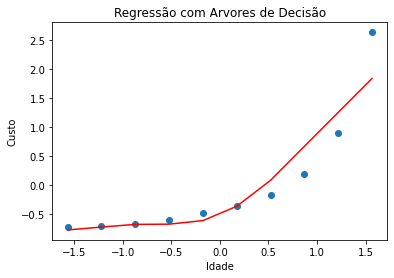

In [0]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.title('Regressão com Arvores de Decisão')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [0]:
previsao = regressor.predict(scaler_X.transform([[40]]))
scaler_y.inverse_transform(previsao)

array([1026.98019849])

##2.Base Preço Casas

In [0]:
X = base.iloc[:, 3:19] .values
y = base.iloc[:, 2:3].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(hidden_layer_sizes=(9,9, 9), activation='relu', solver='adam')
regressor.fit(X_treinamento, y_treinamento)
regressor.score(X_treinamento, y_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.898432134902824

In [0]:
score = regressor.score(X_treinamento, y_treinamento)
score

0.898432134902824

In [0]:
regressor.score(X_teste, y_teste)

0.8815966532765438